## Wine Dataset

In [20]:
from sklearn.datasets import load_wine
samples, labels = load_wine(return_X_y=True)
print (samples.shape)

(178, 13)


## Standardization of Data

In [16]:
import numpy as np
import numpy.linalg as la
#find mean of data
mean = np.mean(samples,axis=0)
# center data
S = samples - mean;
S = S.transpose() # make mxn dim
print("Data matrix shape is: ",S.shape)
U,s,VT = la.svd(S)
#print(U.shape)
U2d = U[:,:2]
features = np.matmul(U2d.transpose(),S)
print("Features shape",features.shape)

Data matrix shape is:  (13, 178)
Features shape (2, 178)


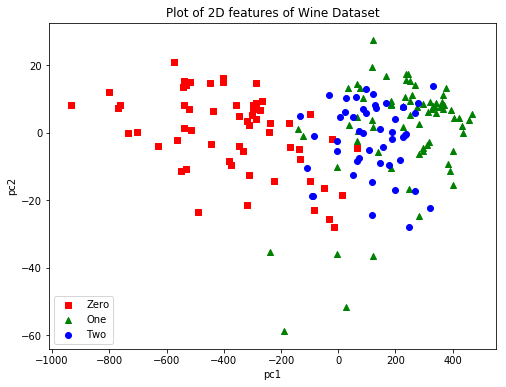

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

pts = features.transpose()
x,y = zip(*pts)
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

for i in range(pts.shape[0]):
    if (labels[i]==0):
        zerop = ax.scatter(x[i], y[i], c='r', marker='s')
    if (labels[i]==1):
        onep = ax.scatter(x[i], y[i], c='g', marker='^')
    if (labels[i]==2):
        twop = ax.scatter(x[i], y[i], c='b', marker='o')
ax.set_title("Plot of 2D features of Wine Dataset")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.legend([zerop,onep,twop], ["Zero","One","Two"],loc=3)

plt.show()

In [24]:
from sklearn.preprocessing import normalize

N = normalize(S)

In [25]:
U_n,s,VT = la.svd(N)
#print(U.shape)
U2d_n = U_n[:,:2]
features_n = np.matmul(U2d_n.transpose(),N)
print("Features shape",features_n.shape)

Features shape (2, 178)


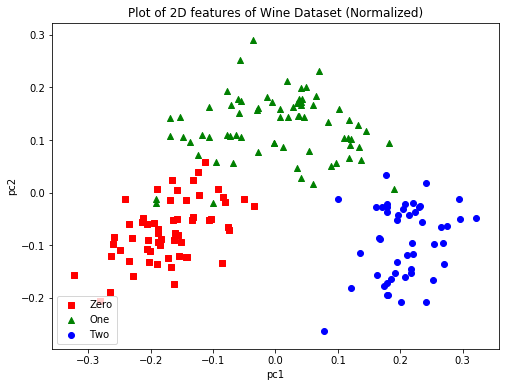

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

pts = features_n.transpose()
x,y = zip(*pts)
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111)

for i in range(pts.shape[0]):
    if (labels[i]==0):
        zerop = ax.scatter(x[i], y[i], c='r', marker='s')
    if (labels[i]==1):
        onep = ax.scatter(x[i], y[i], c='g', marker='^')
    if (labels[i]==2):
        twop = ax.scatter(x[i], y[i], c='b', marker='o')
ax.set_title("Plot of 2D features of Wine Dataset (Normalized)")
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.legend([zerop,onep,twop], ["Zero","One","Two"],loc=3)

plt.show()

By inspection we can say that the centered and normalized dataset provides better PCA features for classification. The reason is that the 3 classes are much more separated in the normalized plot in comparison to the previous plot. If we decide to use SVM, finding a boundary will be much easier with normalized data.

## Naive Bayes Classification